In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import pairwise_distances
sns.set(style="whitegrid")

In [3]:
import DataProvider
import Visualizer
from Clusterer import Clusterer

In [7]:
hamburg="test-data/27_teams_3ce786ba.json"
mainz_alt="test-data/36_teams_5a005256.json"
mainz_complete="test-data/45_teams_b17d628f.json"
rostock="test-data/21_teams_274fc6d7.json"

data = DataProvider.DataProvider(mainz_complete)
dist_matrix = data.get_distance_matrix()
clusterer = Clusterer(data)

dist_percentiles = data.get_distance_percentiles()
print(dist_percentiles)

{50: np.float64(1471.2210021278713), 70: np.float64(2583.900140874688), 75: np.float64(3036.3617304052186), 80: np.float64(3654.757106562651), 90: np.float64(5968.367336202575), 95: np.float64(6776.936351088109), 99: np.float64(15030.71681782411)}


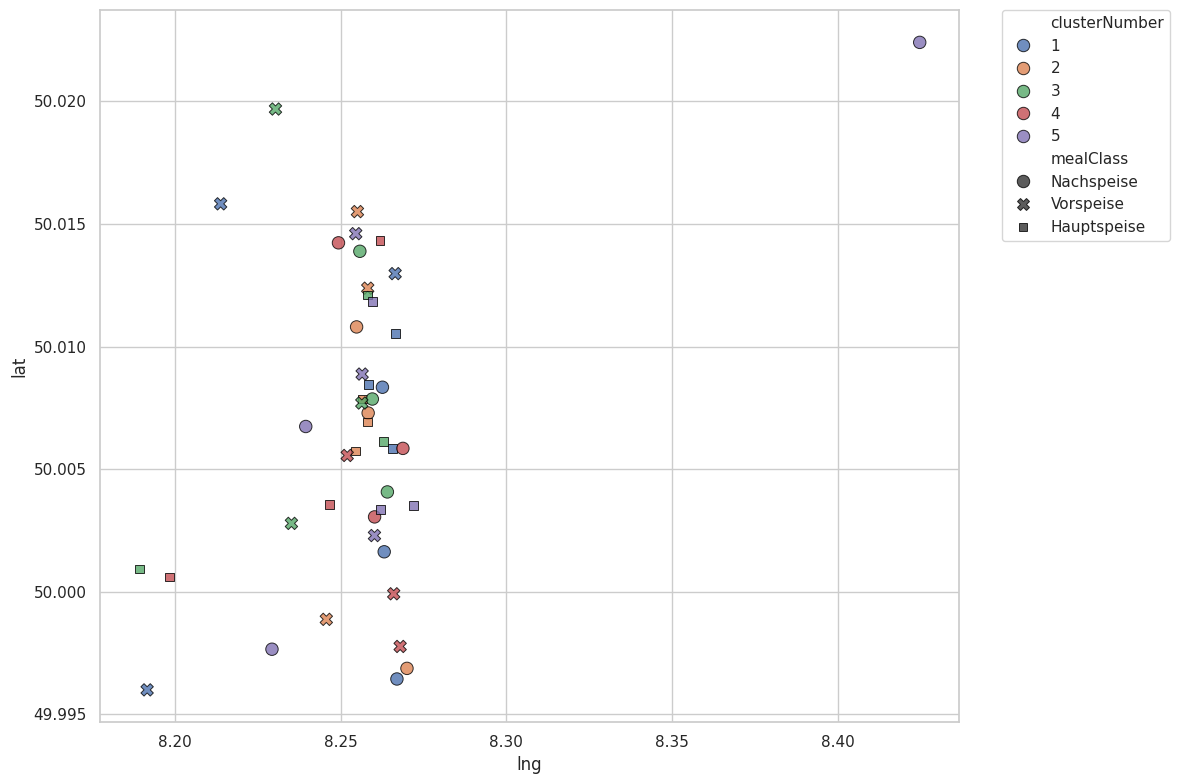

Cluster 1: 9 Elemente, maximale Distanz: 6682.72
Cluster 2: 9 Elemente, maximale Distanz: 2733.00
Cluster 3: 9 Elemente, maximale Distanz: 6338.97
Cluster 4: 9 Elemente, maximale Distanz: 6206.50
Cluster 5: 9 Elemente, maximale Distanz: 17163.29


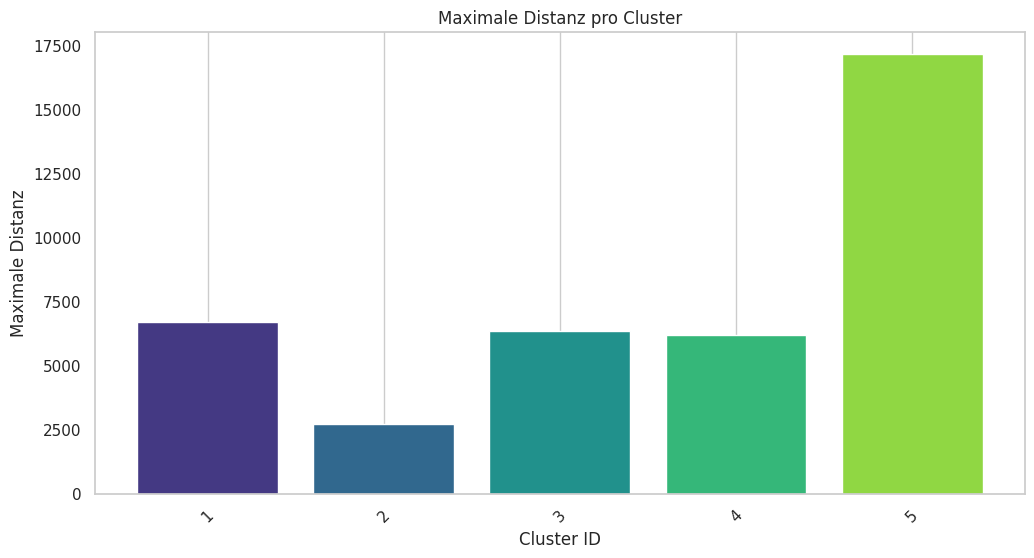

In [8]:
vis = Visualizer.Visualizer(data)
vis.plot_geocodes(data.get_routes())
vis.plot_max_distances_per_cluster(clusterer.print_max_distances_per_cluster())

In [9]:
routes, labels = clusterer.predict()
print (labels)


Cluster 0:
Current meal classes: Counter({'Nachspeise': 12, 'Hauptspeise': 12, 'Vorspeise': 10})
Required meal classes: Counter({'Hauptspeise': 3, 'Nachspeise': 3, 'Vorspeise': 3})
Cluster 0: Hauptspeise excess: 9
Removing indices [33, 38, 6, 41, 10, 42, 44, 15, 16] from cluster 0
Cluster 0: Nachspeise excess: 9
Removing indices [0, 1, 34, 5, 8, 19, 20, 23, 27] from cluster 0
Cluster 0: Vorspeise excess: 7
Removing indices [32, 4, 39, 13, 25, 29, 30] from cluster 0

Cluster 1:
Current meal classes: Counter({'Vorspeise': 2})
Required meal classes: Counter({'Hauptspeise': 3, 'Nachspeise': 3, 'Vorspeise': 3})

Cluster 2:
Current meal classes: Counter({'Vorspeise': 2, 'Nachspeise': 2, 'Hauptspeise': 1})
Required meal classes: Counter({'Hauptspeise': 3, 'Nachspeise': 3, 'Vorspeise': 3})

Cluster 3:
Current meal classes: Counter({'Nachspeise': 1})
Required meal classes: Counter({'Hauptspeise': 3, 'Nachspeise': 3, 'Vorspeise': 3})

Cluster 4:
Current meal classes: Counter({'Hauptspeise': 2, 

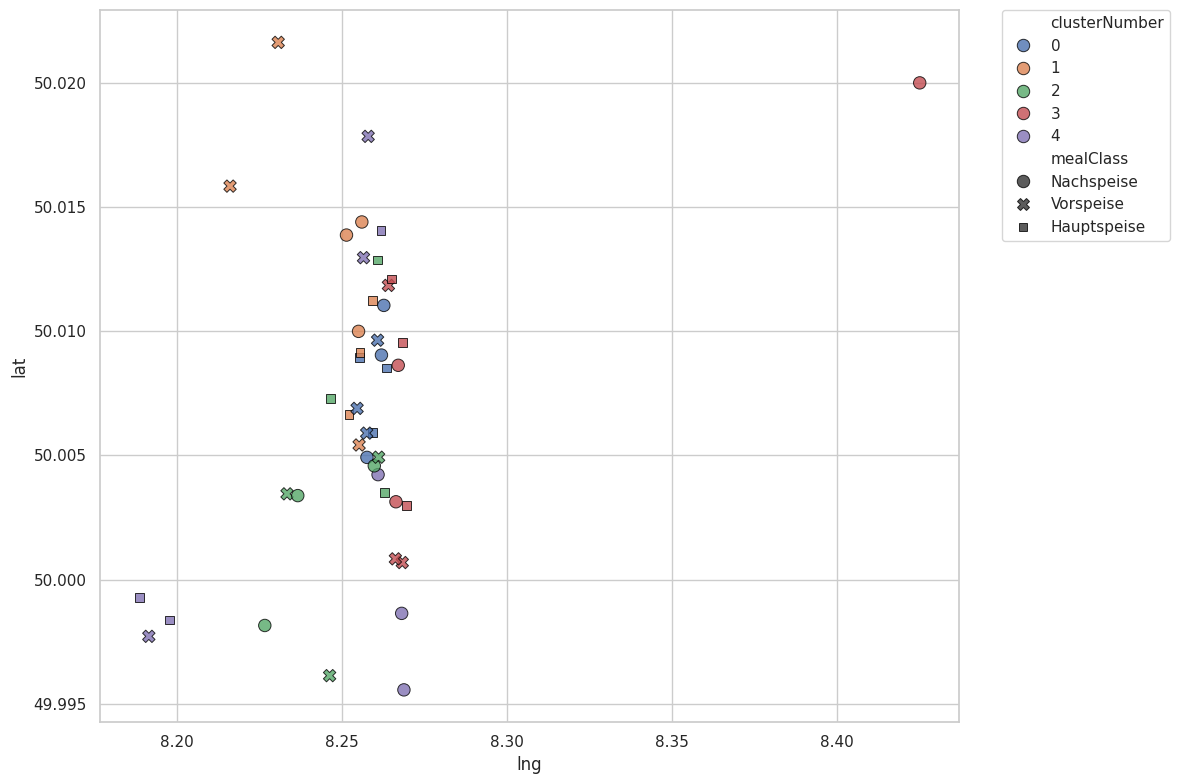

Cluster 0: 9 Elemente, maximale Distanz: 777.81
Cluster 1: 9 Elemente, maximale Distanz: 3755.66
Cluster 2: 9 Elemente, maximale Distanz: 3547.83
Cluster 3: 9 Elemente, maximale Distanz: 13911.57
Cluster 4: 9 Elemente, maximale Distanz: 6848.95


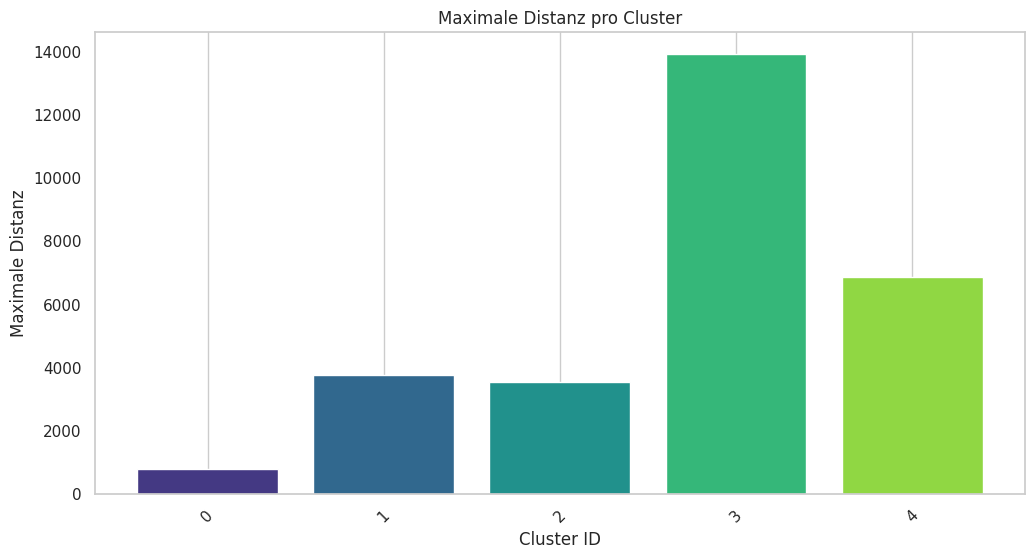

In [10]:
vis.plot_geocodes(routes)
vis.plot_max_distances_per_cluster(clusterer.print_max_distances_per_cluster())

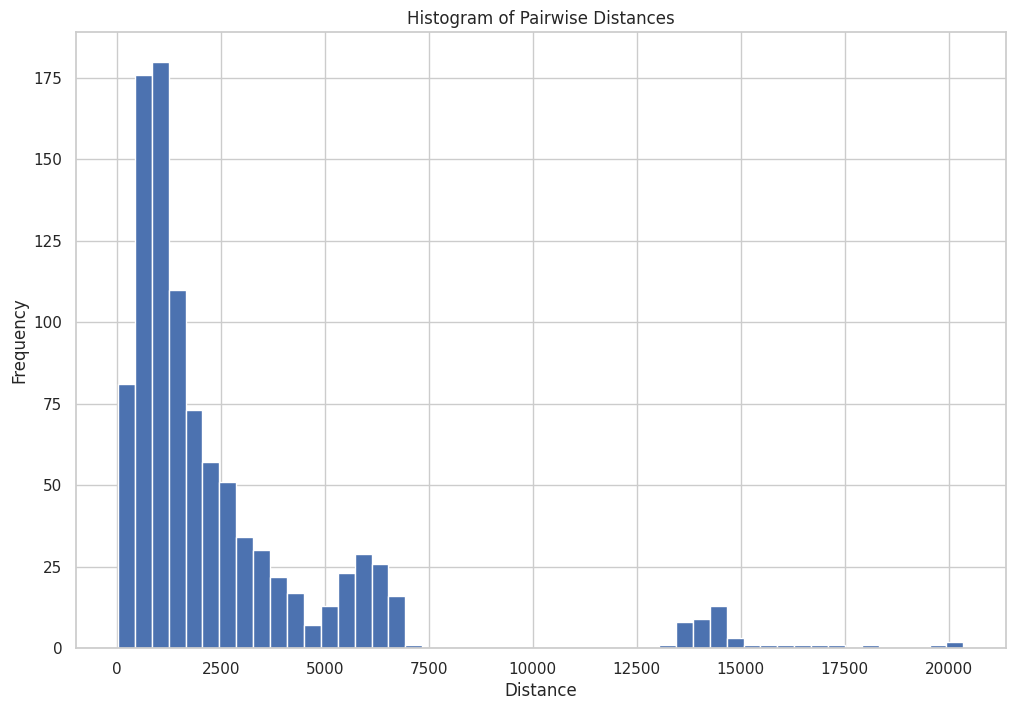

50th percentile: 1471.2210021278713
75th percentile: 3036.3617304052186
90th percentile: 5968.367336202575
95th percentile: 6776.936351088109
99th percentile: 15030.71681782411


In [11]:
vis.plot_distance_threshold()